### Distributions: Plotting histogram

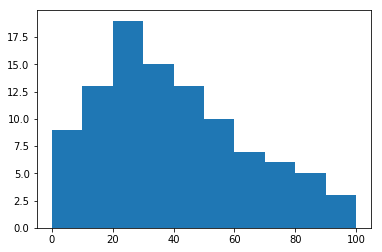

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

sampleData = [1,1,2,3,3,5,7,8,9,
              10,10,11,11,13,13,15,16,17,18,18,18,19,
              20,21,21,23,24,24,25,25,25,25,26,26,26,27,27,27,27,27,29,
              30,30,31,33,34,34,34,35,36,36,37,37,38,38,39,
              40,41,41,42,43,44,45,45,46,47,48,48,49,
              50,51,52,53,54,55,55,56,57,58,
              60,61,63,64,65,66,68,
              70,71,72,74,75,77,81,83,84,87,89,
              90,90,91]

plt.hist(sampleData, bins=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

### Measures of central tendency

In [2]:
import numpy as np
from scipy import stats

sampleMean = np.mean(sampleData)
sampleMedian = np.median(sampleData)
sampleMode = stats.mode(sampleData)

print("Mean:", sampleMean)
print("Median:", sampleMedian)
print("Mode:", sampleMode[0][0])

Mean: 39.26
Median: 36.0
Mode: 27


### Dispersion of a distribution

In [3]:
sampleSD = np.std(sampleData, ddof=1)
print("Sample SD:", sampleSD)

Sample SD: 23.719156474006066


In [4]:
bunchedUpData = [21, 22, 23, 24, 25, 27, 29, 29, 
              31,33,34,34,34,35,36,36,37,37,38,38,39,40,
              41,41,42,43,44,45,45,46,47,48,48,49,50,
              51,52,53,54,55,55,56,57,58,60,
              61,63,64,65,66,68,70,
              71]

(array([ 6.,  4., 11.,  8.,  8.,  7.,  4.,  5.]),
 array([21.  , 27.25, 33.5 , 39.75, 46.  , 52.25, 58.5 , 64.75, 71.  ]),
 <a list of 8 Patch objects>)

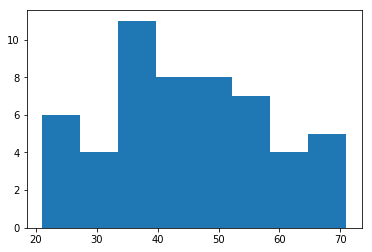

In [5]:
plt.hist(bunchedUpData, bins=8)

In [6]:
sampleSD = np.std(bunchedUpData, ddof=1)
print("Sample SD:", sampleSD)

Sample SD: 13.39112415355003


In [7]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(100) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100

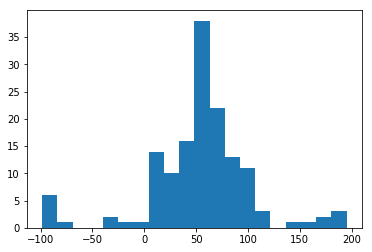

In [8]:
data = np.concatenate((spread, center, flier_high, flier_low))
plt.hist(data, bins=20)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# https://stackoverflow.com/questions/55648729/
# python-how-to-print-the-box-whiskers-and-outlier-values-in-box-and-whisker-plo

def make_labels(ax, boxplot):

    # Grab the relevant Line2D instances from the boxplot dictionary
    iqr = boxplot['boxes'][0]
    caps = boxplot['caps']
    med = boxplot['medians'][0]
    # fly = boxplot['fliers'][0]

    # The x position of the median line
    xpos = med.get_xdata()

    # Lets make the text have a horizontal offset which is some 
    # fraction of the width of the box
    xoff = 0.10 * (xpos[1] - xpos[0])

    # The x position of the labels
    xlabel = xpos[1] + xoff

    # The median is the y-position of the median line
    median = med.get_ydata()[1]

    # The 25th and 75th percentiles are found from the
    # top and bottom (max and min) of the box
    pc25 = iqr.get_ydata().min()
    pc75 = iqr.get_ydata().max()

    # The caps give the vertical position of the ends of the whiskers
    capbottom = caps[0].get_ydata()[0]
    captop = caps[1].get_ydata()[0]

    # Make some labels on the figure using the values derived above
    ax.text(xlabel, median,
            'Median = {:6.3g}'.format(median), va='center')
    ax.text(xlabel, pc25,
            '25th percentile = {:6.3g}'.format(pc25), va='center')
    ax.text(xlabel, pc75,
            '75th percentile = {:6.3g}'.format(pc75), va='center')
    ax.text(xlabel, capbottom,
            'Bottom cap = {:6.3g}'.format(capbottom), va='center')
    ax.text(xlabel, captop,
            'Top cap = {:6.3g}'.format(captop), va='center')

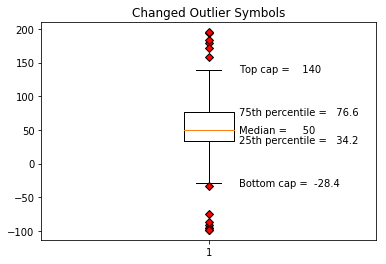

In [10]:
# Make the figure
red_diamond = dict(markerfacecolor='r', marker='D')
_, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')

# Create the boxplot and store the resulting python dictionary
my_boxes = ax3.boxplot(data, flierprops=red_diamond)

# Call the function to make labels
make_labels(ax3, my_boxes)

plt.show()


### Probability Distributions and Random Sampling

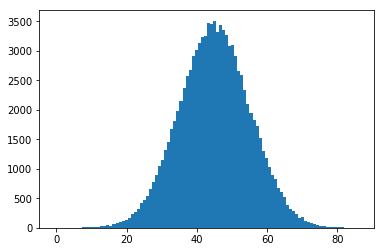

In [11]:
xn = np.random.normal(45, 10, 100000)

plt.hist(xn, bins=100)
plt.show()

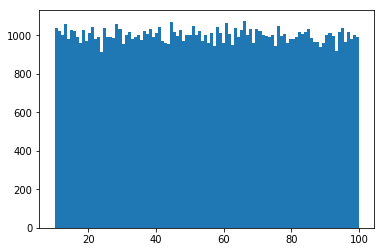

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)
xu = np.random.uniform(10,100,100000)

plt.hist(xu, bins=100)
plt.show()

### Correlations

Pearson's Correlation Coefficient for Sample Populations:

$r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}$ <br>
$\quad = \frac{
              \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})
              } 
              {
              \sqrt{ 
                    \sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2
                    }
              }
$

In [35]:
# I want a line. y = 10*x + 3

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.random.uniform(-10, 10, 100)
y = 10*x + 3

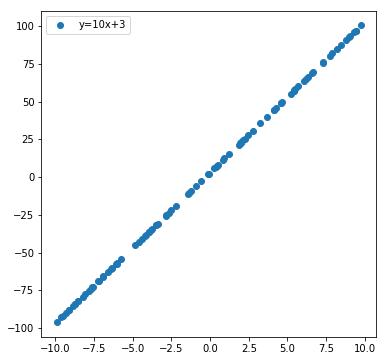

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, label="y=10x+3")
plt.legend()
plt.show()

In [15]:
from scipy import stats
(corr, p) = stats.pearsonr(x, y)
print("PCC:", corr)
print("p-value:", p)

PCC: 0.9999999999999998
p-value: 0.0


In [16]:
# I want a line with negative slope. y = -10*x + 3

x = np.random.uniform(-10, 10, 100)
y = -10*x + 3

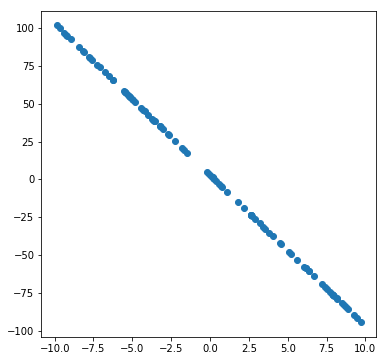

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(x, y)

In [18]:
(corr, p) = stats.pearsonr(x, y)
print("PCC:", corr)
print("p-value:", p)

PCC: -0.9999999999999998
p-value: 0.0


In [38]:
# A half parabola.

x = np.random.uniform(0, 10, 500)
y = np.random.uniform(-5, 5, 500)

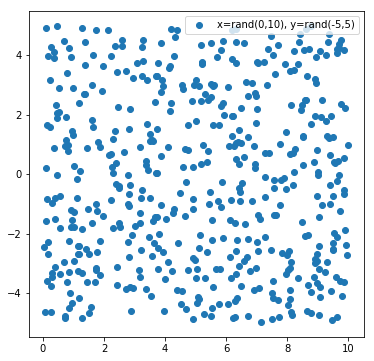

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, label="x=rand(0,10), y=rand(-5,5)")
plt.legend()
plt.show()

In [33]:
(corr, p) = stats.pearsonr(x, y)
print("PCC:", corr)
print("p-value:", p)

PCC: -0.04030446962847961
p-value: 0.368468859153506


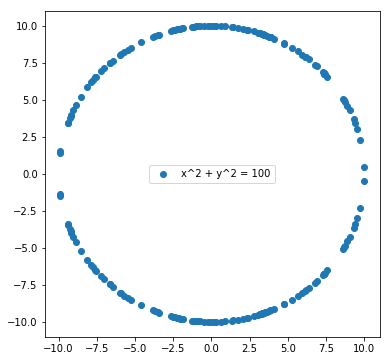

In [55]:
# We want a circle. x^2 + y^2 = 100.
x = np.random.uniform(-10, 10, 100)
yplus = np.sqrt(100 - x*x)
yminus = -np.sqrt(100 - x*x)

X = list(x) + list(x)
Y = list(yplus) + list(yminus)

plt.figure(figsize=(6,6))
plt.scatter(X, Y, label='x^2 + y^2 = 100')
plt.legend(loc='center')
plt.show()

In [56]:
(corr, _) = stats.pearsonr(X, Y)
print("PCC:", corr)

PCC: 0.0


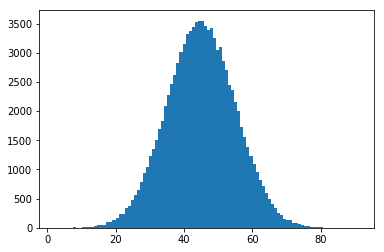

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

xn = np.random.normal(45, 10, 100000)

plt.hist(xn, bins=100)
plt.show()

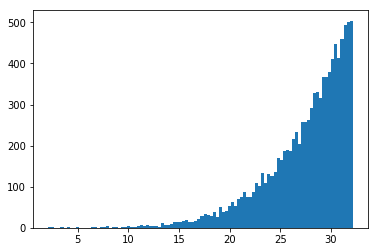

In [11]:
xnsrtd = np.sort(xn)
xnsrtds = xns[0:10000]
plt.hist(xnsrtds, bins=100)
plt.show()

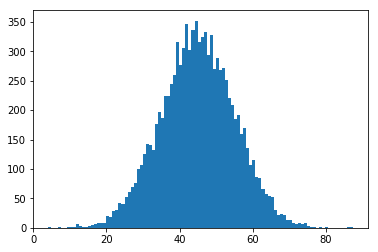

In [12]:
xns = xn[0:10000]
plt.hist(xns, bins=100)
plt.show()

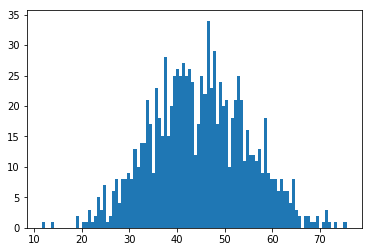

In [14]:
import random

nrandSamp = random.sample(list(xnsrtd), 1000)

plt.hist(nrandSamp, bins=100)
plt.show()

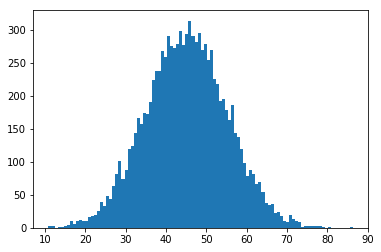

In [15]:
nrandSamp = random.sample(list(xnsrtd), 10000)

plt.hist(nrandSamp, bins=100)
plt.show()